# Single layer perceptron learning implemented
Here I try to implement the single layer perceptron model

Starting with two linearly  separable classes

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


posExamples=0
negExamples=0
epochGlobal = 500
learningRate = 0.3

In [2]:
# having passed no of features and no of points
# makes and returns a set of linearly separable classes

def generateTrainingSet(noClasses=2,noFeatures=1,noPoints=5):
    #assert noClasses>3, "Not implemented generation function for classes more than 3"
    #assert noClasses<=1, "Dont be silly"
    global posExamples,negExamples
    
    if(noClasses==2):
        mu, sigma = 15, 2 # mean and standard deviation
        
        xClass1 = np.random.normal(mu, sigma, (noFeatures,noPoints))
        posExamples = np.copy(xClass1)

        rowvec = np.ones((1,noPoints)) #column vector of 1s
        yVec1 = np.ones((noPoints,1))
        #print(xClass1.shape,x1Row.shape)
        xClass1 = np.vstack((rowvec,xClass1))
        #print(xClass1)


        mu, sigma = 5, 2 # mean and standard deviation
        xClass2 = np.random.normal(mu, sigma, (noFeatures,noPoints))
        negExamples = np.copy(xClass2)

        yVec0 = np.ones((noPoints,1))
        yVec0 = -yVec0
        #print(xClass1.shape,x1Row.shape)
        xClass2 = np.vstack((rowvec,xClass2))

        x = np.hstack((xClass1,xClass2))
        #x = np.vstack((rowvec,x))
        y = np.vstack((yVec1,yVec0))

        #print(x,y)
        return x,y
    elif(noClasses==3):
        
        rowvec = np.ones((1,noPoints)) #row vector of 1s
        oneVec = np.ones((noPoints,1))
        zeroVec = np.zeros((noPoints,1))
        
        mu, sigma = 15, 2 # mean and standard deviation
        
        xClass1 = np.random.normal(mu, sigma, (noFeatures,noPoints))
        posExamples = np.copy(xClass1)        
        #print(xClass1.shape,x1Row.shape)
        xClass1 = np.vstack((rowvec,xClass1))
        yVec10 = np.hstack((oneVec,zeroVec))


        mu, sigma = 5, 2 # mean and standard deviation
        xClass2 = np.random.normal(mu, sigma, (noFeatures,noPoints))
        negExamples = np.copy(xClass2)

        xClass2 = np.vstack((rowvec,xClass2))
        yVec01 = np.hstack((oneVec,zeroVec))

        x = np.hstack((xClass1,xClass2))
        #x = np.vstack((rowvec,x))
        y = np.vstack((yVec1,yVec0))
        
        mu, sigma = 30, 2 
        xClass3 = np.random.normal(mu, sigma, (noFeatures,noPoints))
        xClass2 = np.vstack((rowvec,xClass3))
        
        
        #print(x,y)
        return x,y
    
# single layer convergence
# featureNum = no of x features
# outputNo = no of outputs
def constructXYW(noClasses=2,features=2,m=5):
    x,y = generateTrainingSet(noClasses,features,m)
    
    p = noClasses-1
    
    #while(pow(2,p)<noClasses):
    #    p += 1
    
    w = np.ones((x.shape[0],p))
    return x,y,w


Now we set up for graphing and animation

In [60]:
def convergenceAlgoAnim(x,y,w):
    epoch = epochGlobal
    n = learningRate
    wArray = []
    wArray.append(w)
    totalError = 0
    #print("*******************")
    #print(x)
    for i in range(epoch):
        # generate a random array in range 0-m-1 and shuffle its indeces
        # so that you can get a random training example each time and also 
        # cover every example in each epoch
        #print("--------------------------------epoch:",i)
        
        arr = np.arange(x.shape[1])
        np.random.shuffle(arr)
        totalError = 0
        # pick a random training example
        # adjust weight for it
        
        # use a random index j to pick up examples
        for j in np.nditer(arr,order='C',op_flags=['readwrite']):
            #print("-------example: ",j)
            #print("j=",j)
            onePoint = x[:,j]
            onePoint = onePoint.reshape(x.shape[0],1)
            #print("x = ",onePoint)
            #print("w= ",w)
            
            z = np.dot(w.T,onePoint) # y_0.(n+1)  *  (n+1).1 = (y_0,1) dimensions
            z = z.reshape(w.shape[1],1)
            #print("z:",z);
            #making entries of z -1 or 1 based on their values
            z = np.sign(z)
            
            #print("sign z:",z);
            #print("d:",y[j]);
            diff = y[j]-z.T #dim = y_0,1
            #print("diff:",diff);
            
            error = 0
            for idx, val in enumerate(diff):
                if(np.sum(val)>0):
                    error+=1
                elif(np.sum(val)<0):
                    error+=1
            #error = 
            
            #print(z)
            # w = (n+1,y0) diff = y_0,1  onepoint = n+1,1 --- onepoint*diff.T = n+1,y0
            #
            if(error != 0):
                #print("x=",onePoint)
                totalError += error
                w = w + n*np.dot(onePoint,diff)
            
                print("new w: ",w)
            #print("error: ",error)
        print("epoch: ",i)
        print("wrongly classified: ",totalError)
        if(totalError!=0):
            wArray.append(w)
        else:
            break
    #print("*******************")
    #print(x)
    return wArray


new w:  [[ 0.4       ]
 [-1.00965844]
 [-0.74288856]]
new w:  [[1.        ]
 [8.61515139]
 [8.78305733]]
new w:  [[0.4       ]
 [5.98057448]
 [5.99589343]]
new w:  [[-0.2       ]
 [ 3.46138376]
 [ 3.67273206]]
new w:  [[-0.8       ]
 [-2.24268232]
 [ 2.96793906]]
new w:  [[-1.4       ]
 [-3.74680053]
 [ 0.68906788]]
new w:  [[-0.8       ]
 [ 4.63966145]
 [ 9.59629412]]
new w:  [[-1.4       ]
 [ 1.31788782]
 [ 6.91037345]]
new w:  [[-2.        ]
 [-0.04613097]
 [ 2.12789877]]
new w:  [[-2.6       ]
 [-3.5300441 ]
 [-0.57260147]]
new w:  [[-2.        ]
 [ 7.42593749]
 [ 9.46946648]]
new w:  [[-2.6       ]
 [ 3.90996789]
 [ 5.64305813]]
new w:  [[-3.2       ]
 [ 0.83443436]
 [ 3.02395996]]
new w:  [[-3.8       ]
 [-2.88474569]
 [-2.86481697]]
new w:  [[-3.2       ]
 [ 5.08624913]
 [ 5.78510986]]
new w:  [[-3.8       ]
 [ 1.67445932]
 [ 2.33917146]]
new w:  [[-4.4       ]
 [-0.70070574]
 [-0.93363814]]
new w:  [[-3.8       ]
 [ 7.2077674 ]
 [ 8.19364656]]
new w:  [[-4.4       ]
 [ 3.232023

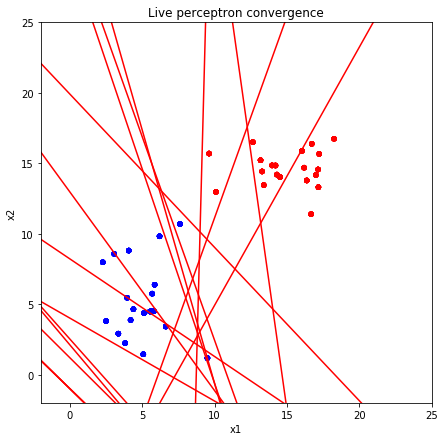

In [59]:
x,y,w = constructXYW(m=20)
#print(y)
#print(x)
wArray = convergenceAlgoAnim(x,y,w)
fig, ax = plt.subplots(figsize=(7,7))

#print(wArray)
ax.set_xlim(( -2, 25))
ax.set_ylim((-2, 25))

gPos = posExamples
gNeg = negExamples
data = (gPos,gNeg)
colors = ("red","blue")
groups = ("positive", "negative")

def animate(i):
    w = wArray[i]
    #print(w)
    a = np.linspace(-5,30,10)
    b = (-w[1]*a-w[0])/w[2]
    pp = plt.plot(a, b, '-r')
    
    
    for d, color, group in zip(data, colors, groups):
        x, y = d
        ax.scatter(x, y, alpha=0.8, c=color, edgecolors='none', s=30, label=group)
    
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Live perceptron convergence')
    return pp

anim = animation.FuncAnimation(fig, animate, frames=len(wArray), interval=20, blit=True)

d = HTML(anim.to_jshtml())


In [39]:
d

Now we try for 3 class 2 feature perceptron

In [65]:

# lets construct 3 clusters of points and corresponding y
newx = np.array([[1,1, 1,1, 1,1],[1,1.5, 5,5.5, 6,6.5],[1,1.5, 1,2, 6,6.5], [1,1, 1,1, 1,1]])
newy = np.array([[1,-1,-1],[1,-1,-1], [-1,1,-1],[-1,1,-1], [-1,-1,1],[-1,-1,1]])
neww = np.random.normal(1,17,(newx.shape[0],3))

wArray2 = convergenceAlgoAnim(newx,newy,neww)
wArray2

new w:  [[-13.33303776  29.69605249  18.48389941]
 [  1.51312797 -20.39859216 -15.28308263]
 [  0.1122431  -23.05868696  18.52617894]
 [ 13.11804703   4.02205658  -6.66879198]]
new w:  [[-13.33303776  29.69605249  17.88389941]
 [  1.51312797 -20.39859216 -16.18308263]
 [  0.1122431  -23.05868696  17.62617894]
 [ 13.11804703   4.02205658  -7.26879198]]
new w:  [[-13.33303776  29.69605249  17.28389941]
 [  1.51312797 -20.39859216 -16.78308263]
 [  0.1122431  -23.05868696  17.02617894]
 [ 13.11804703   4.02205658  -7.86879198]]
new w:  [[-13.93303776  29.69605249  17.28389941]
 [ -2.08687203 -20.39859216 -16.78308263]
 [ -3.4877569  -23.05868696  17.02617894]
 [ 12.51804703   4.02205658  -7.86879198]]
epoch:  0
wrongly classified:  4
new w:  [[-13.93303776  30.29605249  17.28389941]
 [ -2.08687203 -17.09859216 -16.78308263]
 [ -3.4877569  -21.85868696  17.02617894]
 [ 12.51804703   4.62205658  -7.86879198]]
new w:  [[-13.93303776  30.89605249  17.28389941]
 [ -2.08687203 -14.09859216 -16.

[array([[-12.73303776,  29.69605249,  18.48389941],
        [  5.41312797, -20.39859216, -15.28308263],
        [  4.0122431 , -23.05868696,  18.52617894],
        [ 13.71804703,   4.02205658,  -6.66879198]]),
 array([[-13.93303776,  29.69605249,  17.28389941],
        [ -2.08687203, -20.39859216, -16.78308263],
        [ -3.4877569 , -23.05868696,  17.02617894],
        [ 12.51804703,   4.02205658,  -7.86879198]]),
 array([[-13.93303776,  30.89605249,  17.28389941],
        [ -2.08687203, -14.09859216, -16.78308263],
        [ -3.4877569 , -21.25868696,  17.02617894],
        [ 12.51804703,   5.22205658,  -7.86879198]]),
 array([[-13.33303776,  31.49605249,  16.68389941],
        [ -1.48687203,  -8.39859216, -17.38308263],
        [ -2.8877569 , -20.05868696,  16.42617894],
        [ 13.11804703,   5.82205658,  -8.46879198]]),
 array([[-1.21330378e+01,  3.14960525e+01,  1.54838994e+01],
        [ 1.31279714e-02, -3.59859216e+00, -1.88830826e+01],
        [-1.38775690e+00, -1.97586870e